In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

2023-12-05 08:07:29.842414: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-05 08:07:29.842479: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-05 08:07:29.842516: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-05 08:07:29.854544: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv("preprocessing.csv", index_col=0)
data.head(10)

,Age,EdLevel,YearsExp,YearsProExp,PreviousSalary,NumSkills,Employed
0,0,4,7,4,51552,4,0
1,0,3,12,5,46482,12,1
2,0,4,15,6,77290,7,0
3,0,3,9,6,46135,13,0
5,0,4,9,2,38915,5,0
6,1,4,26,18,77831,17,1
7,0,4,14,5,81319,4,0
8,1,3,39,21,68507,3,0
9,1,4,20,16,37752,6,0
10,0,3,4,2,122580,18,1


In [3]:
df_x = data[["Age", "EdLevel", "YearsExp", "YearsProExp", "PreviousSalary", "NumSkills"]]
df_x.head(10)

,Age,EdLevel,YearsExp,YearsProExp,PreviousSalary,NumSkills
0,0,4,7,4,51552,4
1,0,3,12,5,46482,12
2,0,4,15,6,77290,7
3,0,3,9,6,46135,13
5,0,4,9,2,38915,5
6,1,4,26,18,77831,17
7,0,4,14,5,81319,4
8,1,3,39,21,68507,3
9,1,4,20,16,37752,6
10,0,3,4,2,122580,18


In [4]:
df_y = data[["Employed"]]
df_y.head(10)

,Employed
0,0
1,1
2,0
3,0
5,0
6,1
7,0
8,0
9,0
10,1


In [5]:
x_train, x_valid, y_train, y_valid = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

print(f"Data before splitting: {len(df_x)}")
print(f"Train data: {len(x_train)}")
print(f"Validation data: {len(x_valid)}")

Data before splitting: 66965
Train data: 53572
Validation data: 13393


In [6]:
EPOCH = 15
LEARNING_RATE = 1e-3

In [7]:
len_feature = len(df_x.columns)

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len_feature,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=EPOCH, validation_data=(x_valid, y_valid))

2023-12-05 08:07:43.724710: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-05 08:07:43.734567: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-05 08:07:43.734621: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-05 08:07:43.736114: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-05 08:07:43.736154: I tensorflow/compile

Epoch 1/15


2023-12-05 08:07:45.329011: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f2cdd061e00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-05 08:07:45.329068: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-12-05 08:07:45.335107: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-05 08:07:45.478543: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8906
2023-12-05 08:07:45.574082: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1675/1675 [==============================] - 12s 6ms/step - loss: 132.5378 - accuracy: 0.5169 - val_loss: 11.6334 - val_accuracy: 0.5347
Epoch 2/15
1675/1675 [==============================] - 12s 7ms/step - loss: 27.0106 - accuracy: 0.5434 - val_loss: 15.3686 - val_accuracy: 0.5404
Epoch 3/15
1675/1675 [==============================] - 12s 7ms/step - loss: 25.0865 - accuracy: 0.5637 - val_loss: 6.3464 - val_accuracy: 0.5785
Epoch 4/15
1675/1675 [==============================] - 12s 7ms/step - loss: 19.4405 - accuracy: 0.5825 - val_loss: 35.7990 - val_accuracy: 0.5364
Epoch 5/15
1675/1675 [==============================] - 12s 7ms/step - loss: 17.4648 - accuracy: 0.5945 - val_loss: 39.6773 - val_accuracy: 0.5374
Epoch 6/15
1675/1675 [==============================] - 12s 7ms/step - loss: 21.7084 - accuracy: 0.5923 - val_loss: 11.0330 - val_accuracy: 0.5998
Epoch 7/15
1675/1675 [==============================] - 11s 7ms/step - loss: 19.2131 - accuracy: 0.6055 - val_loss: 5.5097 - val_

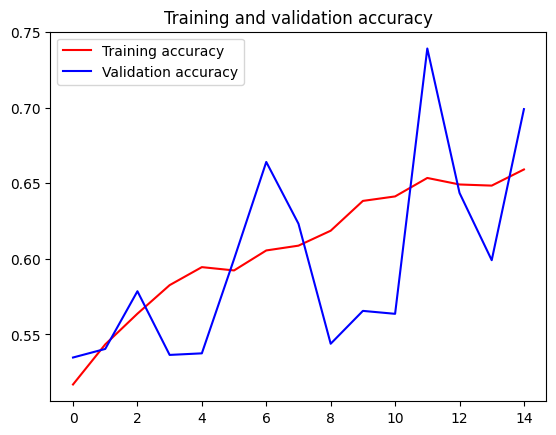

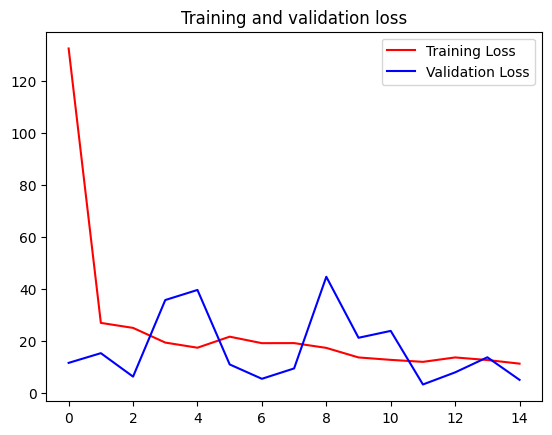

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
model.predict([[1,0,1,0,1,0,0,1,0,1,0,4,1,0.14,0.08,0.230139,0.037383]])

ValueError: in user code:

    File "/home/abayup14/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 2416, in predict_function  *
        return step_function(self, iterator)
    File "/home/abayup14/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 2401, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/abayup14/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 2389, in run_step  **
        outputs = model.predict_step(data)
    File "/home/abayup14/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 2357, in predict_step
        return self(x, training=False)
    File "/home/abayup14/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/abayup14/.local/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 6), found shape=(None, 17)
